<a href="https://colab.research.google.com/github/andreidm92/computer_vision_tasks/blob/main/practice/Lesson_29_segmentation_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Урок 29: Сравнение методов сегментации
### Semantic, Instance, Panoptic, SAM + Метрики + Практика + Линейная алгебра

## 🧠 Сегментация в компьютерном зрении: Полный разбор


### 📌 1. Semantic Segmentation

**Задача:** Назначить каждому пикселю класса изображение метку — "к чему он принадлежит".

$$
\forall (x, y) \in I, \quad f(x, y) \rightarrow c \in \{C_1, C_2, ..., C_k\}
$$

**Архитектуры:**  
- FCN (Fully Convolutional Network)  
- DeepLabV3+

**Плюсы:**  
- Подходит для классификации сред  
- Быстрое обучение  
- Прямолинейная архитектура  

**Минусы:**  
- Не различает экземпляры объектов



### 📌 2. Instance Segmentation

**Задача:** Назначить каждому объекту не только класс, но и уникальный ID.

$$
f(x, y) \rightarrow (c_i, id_j)
$$

**Архитектура:**  
- Mask R-CNN

**Плюсы:**  
- Отлично подходит для подсчета и трекинга

**Минусы:**  
- Требует больше вычислений и данных



### 📌 3. Panoptic Segmentation

**Цель:** Объединение semantic и instance: каждому пикселю — класс + уникальный экземпляр.

$$
f(x, y) \rightarrow
\begin{cases}
(c_i, id_j), & \text{если } c_i \in \text{thing}\\
c_k, & \text{если } c_k \in \text{stuff}
\end{cases}
$$

**Архитектура:** Panoptic FPN

**Метрика:**

$$
PQ = \frac{\sum_{(p, g) \in TP} IoU(p, g)}{|TP| + \frac{1}{2}|FP| + \frac{1}{2}|FN|}
$$



### 📌 4. Prompt-Based Segmentation (SAM)

**Segment Anything Model (SAM):**  
- Вход: изображение + prompt  
- Выход: маска  
- Архитектура: ViT + Prompt Encoder + Mask Decoder  

**Преимущества:**  
- Zero-shot сегментация  
- Универсальный подход  
- Подходит для интерактивных задач



## 📊 Метрики оценки сегментации

| Метрика | Формула | Описание |
|--------|---------|----------|
| **IoU** | $$ IoU = \frac{|A \cap B|}{|A \cup B|} $$ | Intersection over Union |
| **mIoU** | $$ mIoU = \frac{1}{K} \sum_{i=1}^K IoU_i $$ | Среднее по классам |
| **PQ** | см. выше | Panoptic Quality: комбинирует точность и полноту



## 🧭 Когда использовать что?

| Сценарий | Метод |
|----------|-------|
| Автомобильный автопилот | Panoptic |
| Медицинская диагностика | Semantic |
| Подсчёт и трекинг людей | Instance |
| Интерактивная разметка | SAM


## 🧪 OpenCV практика: визуализация сегментации

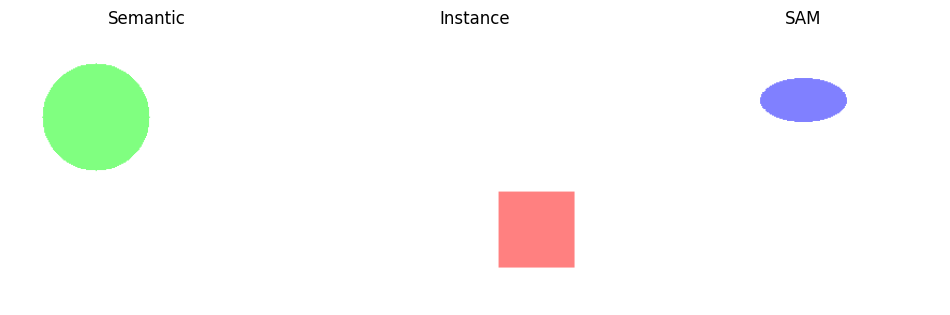

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def overlay_mask(image, mask, alpha=0.5, color=(0, 255, 0)):
    overlay = image.copy()
    overlay[mask > 0] = color
    return cv2.addWeighted(image, 1 - alpha, overlay, alpha, 0)

# Заглушка изображения и масок
image = np.ones((256, 256, 3), dtype=np.uint8) * 255
semantic_mask = np.zeros((256, 256), dtype=np.uint8)
instance_mask = np.zeros((256, 256), dtype=np.uint8)
sam_mask = np.zeros((256, 256), dtype=np.uint8)

# Рисуем объекты
cv2.circle(semantic_mask, (80, 80), 50, 1, -1)
cv2.rectangle(instance_mask, (150, 150), (220, 220), 1, -1)
cv2.ellipse(sam_mask, (128, 64), (40, 20), 0, 0, 360, 1, -1)

# Визуализация
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Semantic")
plt.imshow(overlay_mask(image, semantic_mask, color=(0, 255, 0)))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Instance")
plt.imshow(overlay_mask(image, instance_mask, color=(255, 0, 0)))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("SAM")
plt.imshow(overlay_mask(image, sam_mask, color=(0, 0, 255)))
plt.axis("off")

plt.show()


🧩 Функция наложения маски на изображение


def overlay_mask(image, mask, alpha=0.5, color=(0, 255, 0)):
    overlay = image.copy()
    overlay[mask > 0] = color
    return cv2.addWeighted(image, 1 - alpha, overlay, alpha, 0)


Разберём по шагам:


overlay = image.copy() — создаём копию изображения, чтобы не менять оригинал.

overlay[mask > 0] = color — где маска > 0, накладываем заданный цвет.

mask > 0 — бинарная маска (True/False) для определения областей сегментации.


cv2.addWeighted — смешиваем оригинал и маску:

result=image⋅(1−α)+overlay⋅α
Это делает наложение прозрачным (на 50%).


🖼 Создание заглушек (фейковые изображения и маски)


image = np.ones((256, 256, 3), dtype=np.uint8) * 255
Создаёт белое изображение 256x256 с 3 каналами (RGB).

semantic_mask = np.zeros((256, 256), dtype=np.uint8)
instance_mask = np.zeros((256, 256), dtype=np.uint8)
sam_mask = np.zeros((256, 256), dtype=np.uint8)


Три маски (все чёрные изначально, значения 0).


✏️ Рисуем объекты на масках

cv2.circle(semantic_mask, (80, 80), 50, 1, -1)
Рисует круг в semantic_mask радиусом 50, центр — точка (80, 80), значение пикселя = 1.

-1 — означает заливку (не контур, а полная область).

cv2.rectangle(instance_mask, (150, 150), (220, 220), 1, -1)
Прямоугольник для instance сегментации, также заливается.


cv2.ellipse(sam_mask, (128, 64), (40, 20), 0, 0, 360, 1, -1)
Эллипс (примерно имитирует произвольную форму SAM маски), центр в (128, 64), размер 40×20.


🔍 Визуализация масок


plt.figure(figsize=(12, 4))
Создаёт холст для 3 изображений шириной 12 и высотой 4 дюйма.

python
Копировать
Редактировать
plt.subplot(1, 3, 1)  # первая из трех
plt.title("Semantic")
plt.imshow(overlay_mask(image, semantic_mask, color=(0, 255, 0)))
plt.axis("off")
Отображает маску semantic зелёным цветом.

То же самое для:

Instance → красным (255, 0, 0)

SAM → синим (0, 0, 255)

📊 Итог
Ты получаешь 3 изображения рядом:

Первое — наложена semantic маска

Второе — instance

Третье — SAM

Каждое из них окрашено своим цветом и накладывается поверх исходного.



## 📐 Линейная алгебра: координатные системы и переходы


### Однородные координаты

$$
\begin{bmatrix}
x' \\ y' \\ 1
\end{bmatrix}
=
\begin{bmatrix}
R & t \\ 0 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
x \\ y \\ 1
\end{bmatrix}
$$

Поворот и смещение:

$$
T =
\begin{bmatrix}
\cos\theta & -\sin\theta & t_x \\
\sin\theta & \cos\theta & t_y \\
0 & 0 & 1
\end{bmatrix}
$$

Обратное преобразование:

$$
T^{-1} =
\begin{bmatrix}
R^T & -R^T t \\
0 & 1
\end{bmatrix}
$$


In [6]:
import numpy as np

theta = np.deg2rad(45)
tx, ty = 10, 5

T = np.array([
    [np.cos(theta), -np.sin(theta), tx],
    [np.sin(theta),  np.cos(theta), ty],
    [0, 0, 1]
])

p = np.array([2, 3, 1])
p_new = T @ p

print("Исходная точка:", p[:2])
print("После преобразования:", p_new[:2])


Исходная точка: [2 3]
После преобразования: [9.29289322 8.53553391]


In [7]:
import numpy as np

# Угол поворота
theta = np.deg2rad(45)

# Смещение
tx, ty = 10, 5

# Матрица поворота R
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])

# Вектор смещения
t = np.array([[tx], [ty]])

# Матрица T (3x3 однородная)
T = np.eye(3)
T[:2, :2] = R
T[:2, 2:] = t

print("T =\n", T)

# Вычисляем обратную матрицу T^{-1}
T_inv = np.eye(3)
T_inv[:2, :2] = R.T                  # Транспонируем R
T_inv[:2, 2] = -R.T @ t[:, 0]        # Обратный перенос

print("T⁻¹ =\n", T_inv)


T =
 [[ 0.70710678 -0.70710678 10.        ]
 [ 0.70710678  0.70710678  5.        ]
 [ 0.          0.          1.        ]]
T⁻¹ =
 [[  0.70710678   0.70710678 -10.60660172]
 [ -0.70710678   0.70710678   3.53553391]
 [  0.           0.           1.        ]]


In [5]:
# Угол поворота
theta = np.deg2rad(30)

# Смещение
tx, ty = 10, 5

# Матрица поворота R
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])

# Вектор смещения
t = np.array([[tx], [ty]])

# Матрица T (3x3 однородная)
T = np.eye(3)
T[:2, :2] = R
T

array([[ 0.8660254, -0.5      ,  0.       ],
       [ 0.5      ,  0.8660254,  0.       ],
       [ 0.       ,  0.       ,  1.       ]])

📌 Что здесь происходит?
Создаём R — матрицу поворота на
𝜃
θ

Формируем T — однородную матрицу 3×3

Обратная матрица:

𝑅
𝑇
R
T
  — поворот в обратную сторону

−
𝑅
𝑇
⋅
𝑡
−R
T
 ⋅t — компенсируем смещение




🔁 Проверка:
Можешь проверить корректность:

In [8]:
p = np.array([2, 3, 1])
p_prime = T @ p
p_restored = T_inv @ p_prime

print("Исходная точка:", p[:2])
print("После прямого преобразования:", p_prime[:2])
print("После обратного:", p_restored[:2])  # Должно ≈ p[:2]


Исходная точка: [2 3]
После прямого преобразования: [9.29289322 8.53553391]
После обратного: [2. 3.]
